   ID bug type         species  Min Red  Min Green  Min Blue  Max Red  \
0   1      Bee  Apis mellifera      5.0        3.0       0.0    208.0   
1   2      Bee  Apis mellifera      2.0        2.0       0.0    248.0   
2   3      Bee  Apis mellifera      3.0        0.0       0.0    255.0   
3   4      Bee  Apis mellifera      5.0        3.0       0.0    219.0   
4   5      Bee  Apis mellifera      6.0        0.0       0.0    255.0   

   Max Green  Max Blue    Mean Red  ...  Symmetry Index  Orthogonal Ratio  \
0      199.0     193.0   68.085745  ...       63.634699          0.835589   
1      251.0     244.0   63.786498  ...       58.895467          0.684423   
2      255.0     255.0  107.176333  ...       68.856757          0.807236   
3      213.0     201.0   87.588243  ...       56.481787          0.710961   
4      250.0     245.0  123.177003  ...       75.358549          0.749827   

   Haralick Contrast  Haralick Dissimilarity  Haralick Homogeneity  \
0           5.088857        

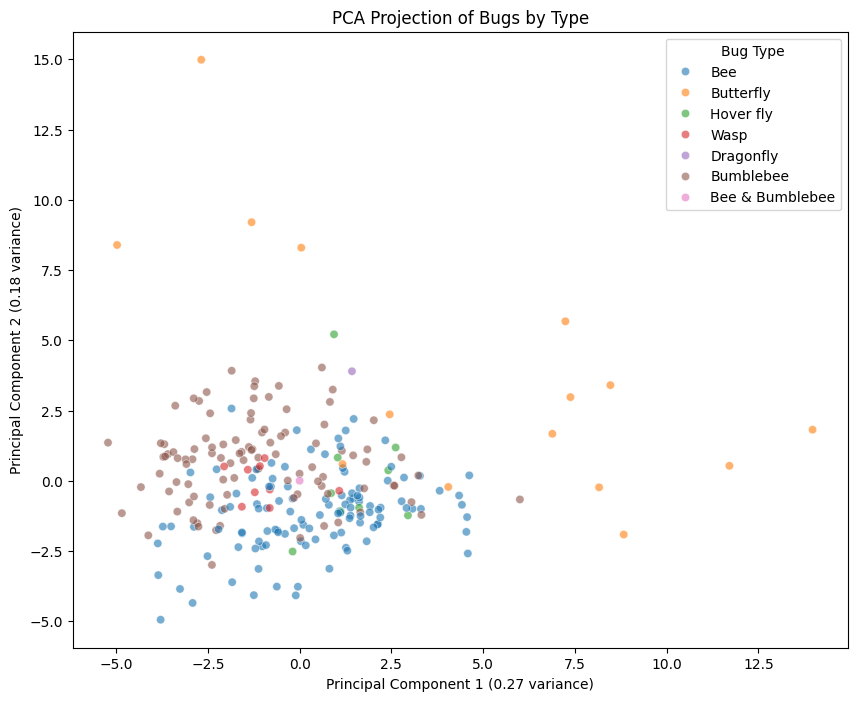

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)

# Afficher un aperçu des données
print(data.head())
print(data.dtypes)

# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Appliquer la PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Bug Type'] = labels

# Afficher la variance expliquée
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par les premières 2 composantes: {explained_variance.cumsum()}")

# Graphique PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Bug Type', data=pca_df, palette='tab10', alpha=0.6)
plt.title('PCA Projection of Bugs by Type')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f} variance)')
plt.legend(title='Bug Type')
plt.show()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)

# Afficher un aperçu des données
print(data.head())
print(data.dtypes)

# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Réduction de dimensionnalité avec PCA avant d'appliquer t-SNE
pca = PCA(n_components=50)
pca_result = pca.fit_transform(features_scaled)

# Afficher la variance expliquée pour les 50 composantes de PCA
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par les premières 50 composantes: {explained_variance.cumsum()}")

# Appliquer le t-SNE avec des paramètres ajustés sur les données réduites par PCA
tsne = TSNE(n_components=2, perplexity=40, learning_rate=100, random_state=42)
tsne_results = tsne.fit_transform(pca_result)

# Créer un DataFrame pour les composantes principales
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Bug Type'] = labels

# Graphique t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Bug Type', data=tsne_df, palette='dark', alpha=0.8)
plt.title('t-SNE Projection of Bugs by Type')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Bug Type')
plt.show()


   ID bug type         species  Min Red  Min Green  Min Blue  Max Red  \
0   1      Bee  Apis mellifera      5.0        3.0       0.0    208.0   
1   2      Bee  Apis mellifera      2.0        2.0       0.0    248.0   
2   3      Bee  Apis mellifera      3.0        0.0       0.0    255.0   
3   4      Bee  Apis mellifera      5.0        3.0       0.0    219.0   
4   5      Bee  Apis mellifera      6.0        0.0       0.0    255.0   

   Max Green  Max Blue    Mean Red  ...  Symmetry Index  Orthogonal Ratio  \
0      199.0     193.0   68.085745  ...       63.634699          0.835589   
1      251.0     244.0   63.786498  ...       58.895467          0.684423   
2      255.0     255.0  107.176333  ...       68.856757          0.807236   
3      213.0     201.0   87.588243  ...       56.481787          0.710961   
4      250.0     245.0  123.177003  ...       75.358549          0.749827   

   Haralick Contrast  Haralick Dissimilarity  Haralick Homogeneity  \
0           5.088857        

ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=27 with svd_solver='full'

   ID bug type         species  Min Red  Min Green  Min Blue  Max Red  \
0   1      Bee  Apis mellifera      5.0        3.0       0.0    208.0   
1   2      Bee  Apis mellifera      2.0        2.0       0.0    248.0   
2   3      Bee  Apis mellifera      3.0        0.0       0.0    255.0   
3   4      Bee  Apis mellifera      5.0        3.0       0.0    219.0   
4   5      Bee  Apis mellifera      6.0        0.0       0.0    255.0   

   Max Green  Max Blue    Mean Red  ...  Symmetry Index  Orthogonal Ratio  \
0      199.0     193.0   68.085745  ...       63.634699          0.835589   
1      251.0     244.0   63.786498  ...       58.895467          0.684423   
2      255.0     255.0  107.176333  ...       68.856757          0.807236   
3      213.0     201.0   87.588243  ...       56.481787          0.710961   
4      250.0     245.0  123.177003  ...       75.358549          0.749827   

   Haralick Contrast  Haralick Dissimilarity  Haralick Homogeneity  \
0           5.088857        

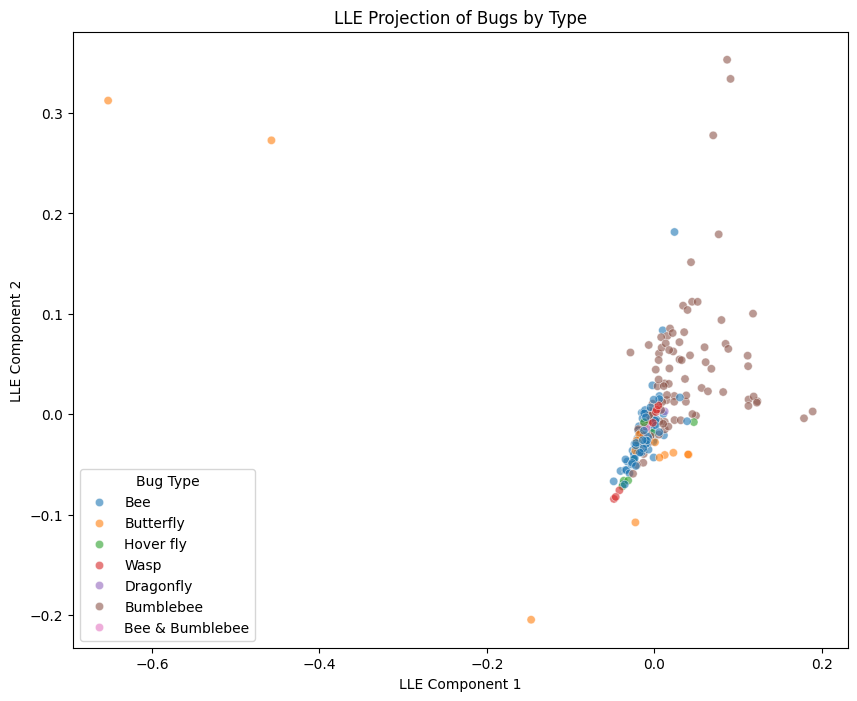

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import LocallyLinearEmbedding

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)

# Afficher un aperçu des données
print(data.head())
print(data.dtypes)

# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Appliquer le LLE
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
lle_results = lle.fit_transform(features_scaled)

# Créer un DataFrame pour les résultats du LLE
lle_df = pd.DataFrame(data=lle_results, columns=['LLE Component 1', 'LLE Component 2'])
lle_df['Bug Type'] = labels

# Graphique LLE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LLE Component 1', y='LLE Component 2', hue='Bug Type', data=lle_df, palette='tab10', alpha=0.6)
plt.title('LLE Projection of Bugs by Type')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.legend(title='Bug Type')
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import umap

# Charger les données depuis le fichier Excel
file_path = '../classif_test_v2.xlsx'
data = pd.read_excel(file_path)

# Afficher un aperçu des données
print(data.head())
print(data.dtypes)

# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Appliquer UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = reducer.fit_transform(features_scaled)

# Créer un DataFrame pour les


ModuleNotFoundError: No module named 'umap'